In [ ]:
!pip install pydae --quiet
!pip install photovoltaic-modeling-python --quiet 
!wget -q https://raw.githubusercontent.com/pydae/pydae/master/src/pydae/edashboards/pvs/pv_dashboard.svg
!wget -q https://raw.githubusercontent.com/pydae/pydae/master/src/pydae/edashboards/pv_model/pv_model_db.svg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 2.7 MB/s eta 0:00:00


## Model parameters obtaining

In [15]:
from photovoltaic_modeling.parameter.parameter_extraction import ParameterExtraction

# http://www.posharp.com/msx120-solar-panel-from-bp-solar_p857364851d.aspx

# from manufacturer
I_sc = 3.87 # short circuit current
I_mpp = 3.56 # maximum power point current
V_mpp = 33.7 # maximum power point voltage
V_oc = 42.1  # open circuit voltage
N_s = 72 # number of cells in series
P_mpp = 120 
K_vt = -0.38 # Temperature Coefficient of V_oc %/Cº
K_it = 0.065  # Temperature Coefficient of I_sc %/Cº     

# from manufacturer Canadian
I_sc = 9.57/2 # short circuit current
I_mpp = 9.08/2 # maximum power point current
V_mpp = 32.5 # maximum power point voltage
V_oc = 39.1  # open circuit voltage
N_s = 60 # number of cells in series
P_mpp = 295/2 
K_vt =-0.29 # Temperature Coefficient of V_oc %/Cº
K_it = 0.05  # Temperature Coefficient of I_sc %/Cº     

# # from manufacturer LONGi Hi-MO LR5-72HTD-560M
# I_sc = 13.87/2 # short circuit current
# I_mpp = 12.95/2 # maximum power point current
# V_mpp = 43.25 # maximum power point voltage
# V_oc = 51.7  # open circuit voltage
# N_s = 144/2 # number of cells in series
# P_mpp = 570/2 
# K_vt =-0.23 # Temperature Coefficient of V_oc %/Cº
# K_it = 0.05  # Temperature Coefficient of I_sc %/Cº     


parameter_extraction = ParameterExtraction(I_sc, V_oc, I_mpp, V_mpp, number_of_cells_in_series = N_s)
initial_guess = [1.0,1000,1] # [series_resistance_estimate,shunt_resistance_estimate,diode_quality_factor_estimate]
parameter_extraction.calculate(initial_guess) 

R_s  = parameter_extraction.series_resistance
R_sh = parameter_extraction.shunt_resistance
K_d  = parameter_extraction.diode_quality_factor

print(f'R_s = {R_s:0.3f} Ω, R_sh = {R_sh:0.1f} Ω, K_d = {K_d:0.4f}')

R_s = 0.467 Ω, R_sh = 79002.9 Ω, K_d = 0.9776


## PV module model

In [2]:
from pydae.edashboards.pv_model.pv_model_module import dashboard as db_pv
db1 = db_pv()
db1.data

{'I_sc': 3.87,
 'V_oc': 42.1,
 'I_mpp': 3.56,
 'V_mpp': 33.7,
 'N_s': 72,
 'K_vt': -0.16,
 'K_it': 0.065,
 'R_pv_s': 0.5602,
 'R_pv_sh': 1862,
 'K_d': 1.3433}

<Figure size 640x480 with 0 Axes>

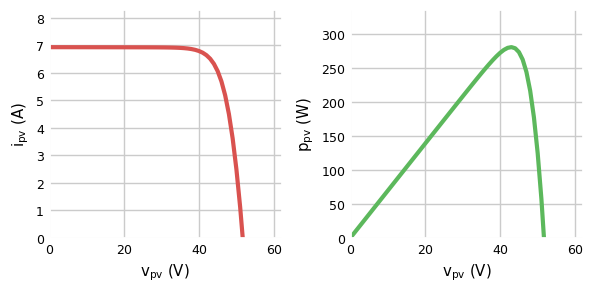

In [3]:
db1.data = {'I_sc': I_sc, 'V_oc': V_oc, 'I_mpp': I_mpp, 'V_mpp': V_mpp,
 'N_s': N_s, 'K_vt': K_vt,  'K_it':K_it,'R_pv_s':R_s, 'R_pv_sh': R_sh,'K_d':K_d}
#db1.build()
db1.ini()
db1.widgets();
db1.show();

In [4]:
K_vt

-0.23

## PV generator dashboard

In [5]:
from pydae.edashboards.pvs.pv_mid_module import dashboard
db = dashboard()
db.build()

In [7]:
db = dashboard()
db.params.update({'I_sc_1': I_sc, 'V_oc_1': V_oc, 'I_mpp_1': I_mpp, 'V_mpp_1': V_mpp,
                  'N_s_1': N_s, 'K_vt_1': K_vt,  'K_it_1':K_it,'R_pv_s_1':R_s, 'R_pv_sh_1': R_sh,'K_d_1':K_d,
                  'N_mp_1':200,'N_ms_1':20})
db.ini()
db.widgets()
db.show()

Maximum number of iterations (max_it = 50) reached without convergence.
